In [68]:
import pandas as pd
import numpy as np
from pydataset import data

import matplotlib.pyplot as plt

from env import host, user, password


In [69]:
def get_db_url(dbname, username=user, hostname=host, passw=password):
    url = f'mysql+pymysql://{username}:{passw}@{hostname}/{dbname}'
    return url

In [192]:

employees = pd.read_sql('SELECT * FROM employees',get_db_url('employees'))
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [72]:
## wrong_url = pd.read_sql('SELECT * FROM employees LIMIT 5',get_db_url('employes'))

## this times out

In [73]:
## sql_error = pd.read_sql('SELCT * FROM employees LIMIT 5',get_db_url('employees'))

## (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'SELCT * FROM employees LIMIT 5' at line 1")

Read the employees and titles tables into two separate DataFrames.

In [74]:
emp_df = pd.read_sql('select * from employees', get_db_url('employees'))
emp_df.shape

(300024, 6)

In [75]:
title_df = pd.read_sql('select * from titles', get_db_url('employees'))
title_df.shape

(443308, 4)

In [101]:
emp_df.describe(), emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


(              emp_no
 count  300024.000000
 mean   253321.763392
 std    161828.235540
 min     10001.000000
 25%     85006.750000
 50%    249987.500000
 75%    424993.250000
 max    499999.000000,
 None)

In [77]:
title_df.describe()

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000


In [103]:
title_df.title.unique()

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

In [104]:
title_df.title.nunique()

7

In [79]:
title_df.sort_values(by='to_date').head(1)

,emp_no,title,from_date,to_date
16064,20869,Engineer,1985-02-17,1985-03-01


In [80]:
title_df.sort_values(by='to_date', ascending=False).head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
251516,270060,Assistant Engineer,1997-12-24,9999-01-01
251529,270070,Senior Staff,1994-12-30,9999-01-01
251528,270069,Senior Engineer,2001-03-31,9999-01-01
251526,270068,Engineer,1999-04-09,9999-01-01


## Exercise 2

In [81]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [82]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [201]:
## What is the result of using a right join on the DataFrames?

right_join = users.merge(roles, left_on='role_id', right_on='id', how='right')

right_join

## gets the same column labels

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [205]:
# What is the result of using an outer join on the DataFrames?

outer_join = users.merge(roles, left_on='role_id', right_on='id', how='outer', indicator=True)

outer_join

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


In [146]:
# What happens if you drop the foreign keys from the DataFrames and try to merge them?

users.merge(roles, left_on = 'role_id', right_on='id', how ='inner').drop(columns=['role_id', 'id_x', 'id_y'])

# it works as long as you drop the duplicates if not you will get an error

,name_x,name_y
0,bob,admin
1,joe,author
2,sally,reviewer
3,adam,reviewer


## Loading MPG data

In [86]:

#  Output and read the documentation for the mpg dataset.
# How many rows and columns are in the dataset?

mpg=data('mpg')
mpg.head()

mpg.shape

(234, 11)

In [87]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [88]:
## Check out your column names and perform any cleanup you may want on them.

print(mpg.columns)

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')


In [206]:
mpg.rename(columns={'cty': 'city', 'hwy': 'highway','fl': 'fuel', 'drv': 'drive', 'displ': 'engine_size'}, inplace=True)

mpg.head()

,manufacturer,model,engine_size,year,cyl,trans,drive,city,highway,fuel,class,mileage_difference,mileage_average,is_automatic,trans_mpg_avg,drive_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True,auto,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False,manual,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False,manual,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True,auto,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True,auto,auto


In [154]:
#how many different manufacturers are there?

mpg['manufacturer'].nunique()

15

In [91]:
#how many different models
len(mpg['model'].unique())

38

In [92]:
# created column for model difference
mpg['mileage_difference'] = mpg.highway - mpg.city

In [170]:
# created column for average mileage

mpg['mileage_average'] = (mpg.highway + mpg.city) / 2

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,mileage_average,is_automatic,trans_mpg_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True,auto


In [119]:
# created is auto column with bools
mpg['is_automatic'] = mpg.trans.str.startswith('a')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,mileage_average,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True


In [207]:
#find the manf. with best avg mileage
mfg_best_avg = mpg.groupby('manufacturer').mileage_average.mean().nlargest(n=1)

mfg_best_avg

manufacturer
honda    28.5
Name: mileage_average, dtype: float64

In [180]:
mpg['drive_avg'] = np.where(mpg.is_automatic == True, 'auto', 'manual')
mpg.groupby('drive_avg').mileage_average.mean()

drive_avg
auto      19.130573
manual    22.227273
Name: mileage_average, dtype: float64

## Exercise 3

In [123]:
chipo_orders  = pd.read_sql('SELECT * FROM orders',get_db_url('chipotle'))

chipo_orders.head(1)


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39


In [133]:
chipo_orders.item_price = chipo_orders.item_price.str.replace('$', '').astype(float)


#chipo_orders.item_price = chipo_orders.item_price.str.astype(float)
chipo_orders['item_price'].dtype

/var/folders/ph/3fq5z80j5qjd537qn7g5pphc0000gn/T/ipykernel_8871/3760777236.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo_orders.item_price = chipo_orders.item_price.str.replace('$', '').astype(float)


dtype('float64')

In [211]:
# What is the total price for each order?

order_sum = chipo_orders.groupby('order_id').item_price.sum()

order_sum

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [128]:
## top 3 most popular

most_pop = chipo_orders.item_name.value_counts().head(3)

most_pop

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Name: item_name, dtype: int64

Text(0.5, 0, 'Units sold')

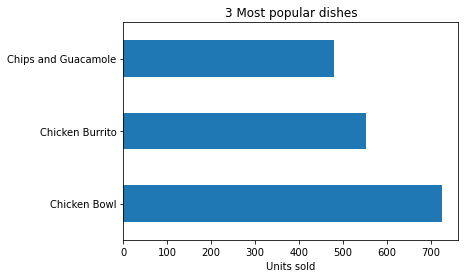

In [218]:
most_pop.plot(kind='barh')

plt.title('3 Most popular dishes')
plt.xlabel('Units sold')

In [143]:
# Item with most revenue

most_rev = chipo_orders.groupby('item_name').item_price.sum().nlargest(n=1)

most_rev

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

In [194]:
# Join employee and titles DF

emp_title = employees.merge(title_df, left_on='emp_no', right_on='emp_no', how='inner')



In [196]:
emp_title.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [209]:
title_count = pd.read_sql('SELECT * FROM employees join titles using(emp_no) join dept_emp using(emp_no) join departments using(dept_no)',get_db_url('employees'))

title_count.head()

pd.crosstab(title_count.title, title_count.dept_no)

dept_no,d001,d002,d003,d004,d005,d006,d007,d008,d009
title,,,,,,,,,
Assistant Engineer,0,0,0,6445,7769,1831,0,378,298
Engineer,0,0,0,49649,58135,13852,0,2986,2362
Manager,2,2,2,4,2,4,2,2,4
Senior Engineer,0,0,0,42205,49326,11864,0,2570,2027
Senior Staff,13940,12139,12274,1270,1247,0,36191,11637,13925
Staff,16196,13929,14342,1478,1424,0,41808,13495,16150
Technique Leader,0,0,0,6557,7683,1795,0,393,309


In [216]:
## streamlined my first query and went with current employees becuase i saw how some dept above had 4 managers. 

title_count2 = pd.read_sql('SELECT * FROM departments join dept_emp using(dept_no) join titles using(emp_no) where titles.to_date > now()',get_db_url('employees'))

#title_count.head()

pd.crosstab(title_count2.title, title_count2.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,68,1833,0,0,0,1542,433,77,0
Engineer,627,15677,0,0,0,13325,3744,830,0
Manager,1,1,1,1,1,1,1,1,1
Senior Engineer,1790,43364,0,0,0,37156,10390,2250,0
Senior Staff,12349,1085,10650,10843,12371,1123,0,10219,32032
Staff,3902,315,3199,3416,3880,349,0,3206,9967
Technique Leader,241,6117,0,0,0,5210,1422,321,0
